In [1]:
from IPython.display import display

# 4.1

## a)

r1/b1=2500.0 r2/a2=1000.0 True
r2/b2=4000.0 r1/a1=1666.6666666666667 True
x1=0 x2=1000.0
x1=1666.6666666666667 x2=0
x1=-799.9998000000002 x2=-499.9998800000001


<ipython-input-11-82b04a90866a>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


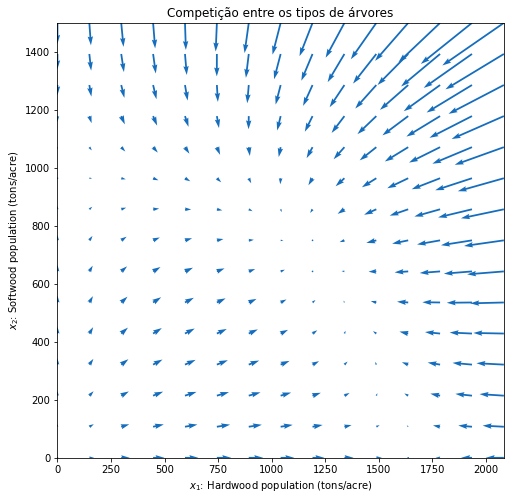

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

a1, a2 = .0003, .0004
b1, b2 = .0002, .0001
r1, r2 = .5, .4

maxx2 = 1500#r1/b1*1.25
maxx1 = r1/a1*1.25

x1, x2 = np.meshgrid(np.linspace(0, maxx1, 15), np.linspace(0, maxx2, 15))

#f1 = r1 - a1*x1 - b1*x2
#f2 = r2 - a2*x2 - b2*x1

f1 = r1*x1 - a1*x1**2 - b1*x1*x2
f2 = r2*x2 - a2*x2**2 - b2*x1*x2

print(f'r1/b1={r1/b1}', f'r2/a2={r2/a2}', r1/b1 > r2/a2)
print(f'r2/b2={r2/b2}', f'r1/a1={r1/a1}', r2/b2 > r1/a1)

print(f'x1=0', f'x2={r2/a2}')
print(f'x1={r1/a1}', 'x2=0')
print(f'x1={r1*a2 - r2*b1/(a1*a2 - b1*b2)}', f'x2={r2*a1 - r1*b2/(a1*a2 - b1*b2)}')

#plt.quiver(x1, x2, f1, f2)
plt.quiver(x1, x2, f1, f2, color='#156dbd')

ax = plt.axes()
ax.set_title("Competição entre os tipos de árvores")
ax.set_xlabel('$x_1$: Hardwood population (tons/acre)')
ax.set_ylabel('$x_2$: Softwood population (tons/acre)')
ax.set_xlim([0, maxx1])
ax.set_ylim([0, maxx2])

plt.show()

b) 4 soluções

In [3]:
from sympy import *
from sympy.plotting import plot, plot3d

In [4]:
x1, x2 = var('x1 x2', real=True)
r1, r2 = var('r1 r2', positive=True)
a1, a2 = var('a1 a2', positive=True)
b1, b2 = var('b1 b2', positive=True)

dFdx1 = r1*x1 - a1*x1**2-b1*x1*x2
dFdx2 = r2*x2 - a2*x2**2-b2*x1*x2

In [5]:
s = solve([dFdx1, dFdx2], [x1, x2], dict=True)
s

[{x1: 0, x2: 0},
 {x1: 0, x2: r2/a2},
 {x1: r1/a1, x2: 0},
 {x1: (a2*r1 - b1*r2)/(a1*a2 - b1*b2), x2: -(-a1*r2 + b2*r1)/(a1*a2 - b1*b2)}]

Hessiana

In [6]:
dFdx1x1 = diff(dFdx1, x1)
dFdx2x2 = diff(dFdx2, x2)
dFdx1x2 = diff(dFdx1, x2)
dFdx2x1 = diff(dFdx2, x1)

H = Matrix([
    [dFdx1x1, dFdx1x2],
    [dFdx2x1, dFdx2x2]
])
H

Matrix([
[-2*a1*x1 - b1*x2 + r1,                -b1*x1],
[               -b2*x2, -2*a2*x2 - b2*x1 + r2]])

Análise

In [7]:
for solucao in s:
    print('Solução: ', solucao)
    display(simplify(H.subs(solucao)))
    print('Autovalores: ')
    display(simplify(H.subs(solucao)).eigenvals())
    print('------------')

Solução:  {x1: 0, x2: 0}


Matrix([
[r1,  0],
[ 0, r2]])

Autovalores: 


{r1: 1, r2: 1}

------------
Solução:  {x1: 0, x2: r2/a2}


Matrix([
[r1 - b1*r2/a2,   0],
[    -b2*r2/a2, -r2]])

Autovalores: 


{r1 - b1*r2/a2: 1, -r2: 1}

------------
Solução:  {x1: r1/a1, x2: 0}


Matrix([
[-r1,     -b1*r1/a1],
[  0, r2 - b2*r1/a1]])

Autovalores: 


{-r1: 1, r2 - b2*r1/a1: 1}

------------
Solução:  {x1: (a2*r1 - b1*r2)/(a1*a2 - b1*b2), x2: -(-a1*r2 + b2*r1)/(a1*a2 - b1*b2)}


Matrix([
[-a1*(a2*r1 - b1*r2)/(a1*a2 - b1*b2), -b1*(a2*r1 - b1*r2)/(a1*a2 - b1*b2)],
[b2*(-a1*r2 + b2*r1)/(a1*a2 - b1*b2), a2*(-a1*r2 + b2*r1)/(a1*a2 - b1*b2)]])

Autovalores: 


{-(a1*a2*r1 + a1*a2*r2 - a1*b1*r2 - a2*b2*r1)/(2*(a1*a2 - b1*b2)) - sqrt(a1**2*a2**2*r1**2 - 2*a1**2*a2**2*r1*r2 + a1**2*a2**2*r2**2 - 2*a1**2*a2*b1*r1*r2 + 2*a1**2*a2*b1*r2**2 + a1**2*b1**2*r2**2 + 2*a1*a2**2*b2*r1**2 - 2*a1*a2**2*b2*r1*r2 + 2*a1*a2*b1*b2*r1*r2 - 4*a1*b1**2*b2*r2**2 + a2**2*b2**2*r1**2 - 4*a2*b1*b2**2*r1**2 + 4*b1**2*b2**2*r1*r2)/(2*(a1*a2 - b1*b2)): 1,
 -(a1*a2*r1 + a1*a2*r2 - a1*b1*r2 - a2*b2*r1)/(2*(a1*a2 - b1*b2)) + sqrt(a1**2*a2**2*r1**2 - 2*a1**2*a2**2*r1*r2 + a1**2*a2**2*r2**2 - 2*a1**2*a2*b1*r1*r2 + 2*a1**2*a2*b1*r2**2 + a1**2*b1**2*r2**2 + 2*a1*a2**2*b2*r1**2 - 2*a1*a2**2*b2*r1*r2 + 2*a1*a2*b1*b2*r1*r2 - 4*a1*b1**2*b2*r2**2 + a2**2*b2**2*r1**2 - 4*a2*b1*b2**2*r1**2 + 4*b1**2*b2**2*r1*r2)/(2*(a1*a2 - b1*b2)): 1}

------------


In [8]:
professor = {a1: 0.10/10000, a2: 0.25/6000, r1: 0.10, r2: 0.25, b1: 0.10/10000/2, b2: 0.25/6000/2}

print("Ponto de equilíbrio 4 - Menores principais")
print(" -> 1º menor principal")
display(simplify(H.subs(s[-1])[0]))
print(" -> 2º menor principal")
display(simplify(H.subs(s[-1]).det()))

Ponto de equilíbrio 4 - Menores principais
 -> 1º menor principal


-a1*(a2*r1 - b1*r2)/(a1*a2 - b1*b2)

 -> 2º menor principal


(a1*a2*r1*r2 - a1*b1*r2**2 - a2*b2*r1**2 + b1*b2*r1*r2)/(a1*a2 - b1*b2)

In [9]:
print("Ponto de equilíbrio 4 - Raízes do polinomio característico")
for raiz in simplify(H.subs(solucao)).eigenvals().keys():
    print('Raiz')
    display(raiz)

Ponto de equilíbrio 4 - Raízes do polinomio característico
Raiz


-(a1*a2*r1 + a1*a2*r2 - a1*b1*r2 - a2*b2*r1)/(2*(a1*a2 - b1*b2)) - sqrt(a1**2*a2**2*r1**2 - 2*a1**2*a2**2*r1*r2 + a1**2*a2**2*r2**2 - 2*a1**2*a2*b1*r1*r2 + 2*a1**2*a2*b1*r2**2 + a1**2*b1**2*r2**2 + 2*a1*a2**2*b2*r1**2 - 2*a1*a2**2*b2*r1*r2 + 2*a1*a2*b1*b2*r1*r2 - 4*a1*b1**2*b2*r2**2 + a2**2*b2**2*r1**2 - 4*a2*b1*b2**2*r1**2 + 4*b1**2*b2**2*r1*r2)/(2*(a1*a2 - b1*b2))

Raiz


-(a1*a2*r1 + a1*a2*r2 - a1*b1*r2 - a2*b2*r1)/(2*(a1*a2 - b1*b2)) + sqrt(a1**2*a2**2*r1**2 - 2*a1**2*a2**2*r1*r2 + a1**2*a2**2*r2**2 - 2*a1**2*a2*b1*r1*r2 + 2*a1**2*a2*b1*r2**2 + a1**2*b1**2*r2**2 + 2*a1*a2**2*b2*r1**2 - 2*a1*a2**2*b2*r1*r2 + 2*a1*a2*b1*b2*r1*r2 - 4*a1*b1**2*b2*r2**2 + a2**2*b2**2*r1**2 - 4*a2*b1*b2**2*r1**2 + 4*b1**2*b2**2*r1*r2)/(2*(a1*a2 - b1*b2))